In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../Customer Transaction Prediction"))

# Any results you write to the current directory are saved as output.

['.ipynb_checkpoints', 'sample_submission', 'Santander-Transaction-master', 'test', 'train', 'Untitled.ipynb']


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [3]:
def create_dataframe(path):
    df=pd.read_csv(path)
    return df

In [4]:
train_df=create_dataframe('train/train.csv')
test_df=create_dataframe('test/test.csv')

In [5]:
print(train_df.shape)
print(test_df.shape)

(200000, 202)
(200000, 201)


In [6]:
train_df.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [7]:
def missing_data(data):
    total=data.isnull().sum()
    percent=(total/data.isnull().count())*100
    tt=pd.concat([total,percent],axis=1,keys=['total','percent'])
    types=[]
    for col in data.columns:
        dtype=str(data[col].dtype)
        types.append(dtype)
    tt['types']=types
    return np.transpose(tt)

In [8]:
missing_data(train_df)

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
total,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
percent,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
types,object,int64,float64,float64,float64,float64,float64,float64,float64,float64,...,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64


In [9]:
missing_data(test_df)

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
total,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
percent,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
types,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,...,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64


In [10]:
train_df.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


In [11]:
test_df.describe()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,10.658737,-1.624244,10.707452,6.788214,11.076399,-5.050558,5.415164,16.529143,0.277135,7.569407,...,3.189766,7.458269,1.925944,3.322016,17.996967,-0.133657,2.290899,8.912428,15.869184,-3.246342
std,3.036716,4.040509,2.633888,2.052724,1.616456,7.869293,0.864686,3.424482,3.333375,1.231865,...,4.551239,3.025189,1.479966,3.995599,3.140652,1.429678,5.446346,0.920904,3.008717,10.398589
min,0.188700,-15.043400,2.355200,-0.022400,5.484400,-27.767000,2.216400,5.713700,-9.956000,4.243300,...,-14.093300,-2.407000,-3.340900,-11.413100,9.382800,-4.911900,-13.944200,6.169600,6.584000,-39.457800
25%,8.442975,-4.700125,8.735600,5.230500,9.891075,-11.201400,4.772600,13.933900,-2.303900,6.623800,...,-0.095000,5.166500,0.882975,0.587600,15.634775,-1.160700,-1.948600,8.260075,13.847275,-11.124000
50%,10.513800,-1.590500,10.560700,6.822350,11.099750,-4.834100,5.391600,16.422700,0.372000,7.632000,...,3.162400,7.379000,1.892600,3.428500,17.977600,-0.162000,2.403600,8.892800,15.943400,-2.725950
75%,12.739600,1.343400,12.495025,8.327600,12.253400,0.942575,6.005800,19.094550,2.930025,8.584825,...,6.336475,9.531100,2.956000,6.174200,20.391725,0.837900,6.519800,9.595900,18.045200,4.935400
max,22.323400,9.385100,18.714100,13.142000,16.037100,17.253700,8.302500,28.292800,9.665500,11.003600,...,20.359000,16.716500,8.005000,17.632600,27.947800,4.545400,15.920700,12.275800,26.538400,27.907400


In [12]:
def plot_feature_scatter(df1, df2, features):
    i = 0
    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(4,4,figsize=(14,14))

    for feature in features:
        i += 1
        plt.subplot(4,4,i)
        plt.scatter(df1[feature], df2[feature], marker='+')
        plt.xlabel(feature, fontsize=9)
    plt.show()

<Figure size 432x288 with 0 Axes>

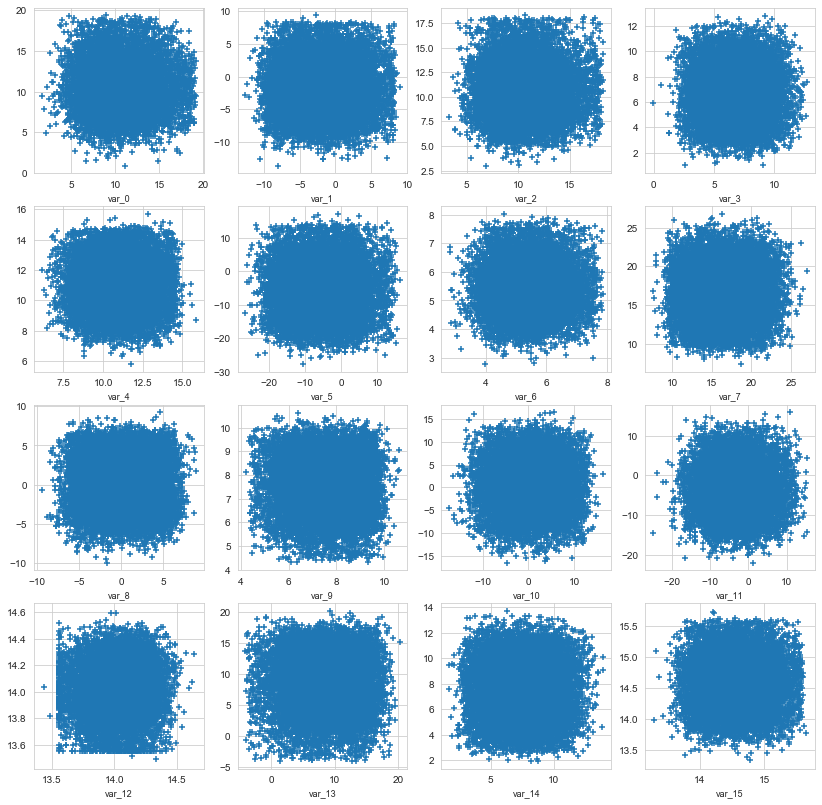

In [13]:
features = ['var_0', 'var_1','var_2','var_3', 'var_4', 'var_5', 'var_6', 'var_7', 
           'var_8', 'var_9', 'var_10','var_11','var_12', 'var_13', 'var_14', 'var_15', 
           ]
plot_feature_scatter(train_df[::20],test_df[::20], features)

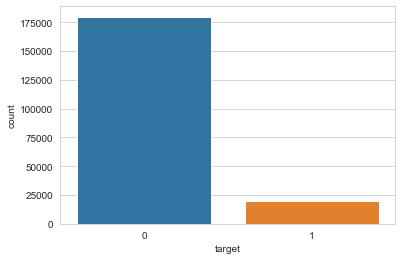

In [14]:
#the distribution of target value in train dataset.

sns.countplot(train_df['target'])

In [15]:
train_df.columns

Index(['ID_code', 'target', 'var_0', 'var_1', 'var_2', 'var_3', 'var_4',
       'var_5', 'var_6', 'var_7',
       ...
       'var_190', 'var_191', 'var_192', 'var_193', 'var_194', 'var_195',
       'var_196', 'var_197', 'var_198', 'var_199'],
      dtype='object', length=202)

In [16]:
%%time
correlations=train_df[features].corr().abs().unstack().sort_values(kind='quicksort').reset_index()
correlations=correlations[correlations['level_0']!=correlations['level_1']]
correlations.head(10)

Wall time: 279 ms


,level_0,level_1,0
0,var_1,var_3,0.000010
1,var_3,var_1,0.000010
2,var_15,var_0,0.000043
3,var_0,var_15,0.000043
4,var_6,var_4,0.000049
5,var_4,var_6,0.000049
6,var_13,var_15,0.000109
7,var_15,var_13,0.000109
8,var_13,var_9,0.000119
9,var_9,var_13,0.000119


In [17]:
correlations.tail(10)

,level_0,level_1,0
230,var_3,var_13,0.005717
231,var_13,var_3,0.005717
232,var_9,var_15,0.006054
233,var_15,var_9,0.006054
234,var_2,var_0,0.006573
235,var_0,var_2,0.006573
236,var_0,var_6,0.006983
237,var_6,var_0,0.006983
238,var_13,var_2,0.008795
239,var_2,var_13,0.008795


In [18]:
features=train_df.columns.values[2:202]
unique_max_train=[]
unique_max_test=[]
for feature in features:
    values=train_df[feature].value_counts()
    unique_max_train.append([feature,values.max(),values.idxmax()])
    values=test_df[feature].value_counts()
    unique_max_test.append([feature,values.max(),values.idxmax()])

In [19]:
np.transpose((pd.DataFrame(unique_max_train,columns=['Feature','Max Duplicates','Value'])).sort_values(by='Max Duplicates',ascending=False).head(15))

,68,108,126,12,91,103,148,71,161,25,125,169,166,133,43
Feature,var_68,var_108,var_126,var_12,var_91,var_103,var_148,var_71,var_161,var_25,var_125,var_169,var_166,var_133,var_43
Max Duplicates,1084,313,305,203,66,61,59,54,52,41,40,39,39,39,39
Value,5.0214,14.1999,11.5356,13.5545,6.9785,1.6662,4.0456,0.7031,5.7688,13.6723,12.5159,5.6941,2.7306,6.8632,11.4522


In [20]:
np.transpose((pd.DataFrame(unique_max_test,columns=['Feature','Max Duplicates','Value'])).sort_values(by='Max Duplicates',ascending=False).head(15))

,68,126,108,12,91,103,148,161,25,71,43,166,125,169,133
Feature,var_68,var_126,var_108,var_12,var_91,var_103,var_148,var_161,var_25,var_71,var_43,var_166,var_125,var_169,var_133
Max Duplicates,1104,307,302,188,86,78,74,69,60,60,58,53,53,51,50
Value,5.0197,11.5357,14.1999,13.5546,6.9939,1.4659,4.0004,5.7114,13.5965,0.5389,11.5738,2.8446,12.2189,5.8455,6.6873


In [21]:
features = [c for c in train_df.columns if c not in ['ID_code', 'target']]
target = train_df['target']
features_train=train_df[features]
features_test=test_df[features]

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(features_train, target, test_size=0.3, random_state=42)

In [22]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [23]:
import lightgbm
param={
    'num_leaves':7,
      'learning_rate':0.01,
    'feature_fraction':0.04,
    'max_depth':17,
    'objective':'binary',
    'boosting_type':'goss',
    'metric':'auc',
      }

In [24]:
trn_data = lightgbm.Dataset(Xtrain, label=ytrain)
val_data = lightgbm.Dataset(Xtest, label=ytest)
model = lightgbm.train(param, trn_data, valid_sets = [trn_data, val_data], verbose_eval=1000, early_stopping_rounds = 100,
                       num_boost_round=32000)

Training until validation scores don't improve for 100 rounds
[1000]	training's auc: 0.888901	valid_1's auc: 0.872054
[2000]	training's auc: 0.900296	valid_1's auc: 0.881747
[3000]	training's auc: 0.907886	valid_1's auc: 0.887156
[4000]	training's auc: 0.913778	valid_1's auc: 0.890786
[5000]	training's auc: 0.918331	valid_1's auc: 0.893214
[6000]	training's auc: 0.922256	valid_1's auc: 0.895098
[7000]	training's auc: 0.925722	valid_1's auc: 0.896406
[8000]	training's auc: 0.928841	valid_1's auc: 0.89722
[9000]	training's auc: 0.931723	valid_1's auc: 0.897857
[10000]	training's auc: 0.934563	valid_1's auc: 0.898343
[11000]	training's auc: 0.937213	valid_1's auc: 0.898604
Early stopping, best iteration is:
[11670]	training's auc: 0.938935	valid_1's auc: 0.898788


In [25]:
data=lightgbm.Dataset(features_train, label=target)
model_out = lightgbm.train(param, data, num_boost_round=11443)

In [26]:
output = model_out.predict(features_test)

In [27]:
ind=test_df.ID_code.values
sol=pd.DataFrame({'ID_code':ind,'target':output},columns=['ID_code','target'])
sol.to_csv('./sol.csv',index=False)